# Estimation on simulated data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

# Singles

### Simulate data

In [68]:
Single = RetirementClass(simN=int(1e5),simT=68-57+1)
Single.solve()
Single.simulate()

In [69]:
shape = (11,8)
mom_data = SMD.MomFunSingle(Single)
mm = mom_data.reshape(shape)
mom_se = SMD.MomFunSingle(Single,calc='std')
weight = SMD.weight_matrix_single(mom_se,shape,factor=[1/10,1/10,1,1,1,1,1,1,1,1/2,1/3])
ww = np.diag(weight).reshape(shape)

### Weight matrix

In [70]:
plt.plot(np.arange(58,69),np.mean(ww,axis=1))
plt.show()

### Moments

In [71]:
plt.plot(np.arange(58,69), mm)
plt.show()

### Set up model for estimation

In [72]:
Single.par.sim_seed = Single.par.sim_seed + 100 # set new seed for estimation
Single.recompute()

In [73]:
# function to generate moments
def mom_fun(Single):
    return SMD.MomFunSingle(Single)

In [74]:
par = Single.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta])
est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta"]

# Setup estimation
smd = SMD.SimulatedMinimumDistance(Single,mom_data,mom_fun)
smd.est_par = est_par

### Run estimation

In [75]:
theta0 = SMD.start(4,bounds=[(0.0,1.0), (0.0,1.0), (-1.0,1.0), (0.2,0.8)])
theta0[0] = list(true)

In [76]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 55 | time: 0.8 min | obj: 0.0012592945558627324
start par: [0.3, 0.5, 0.053, 0.435]
par:       [0.30288498 0.49498706 0.0519707  0.4333996 ]

2 estimation:
success: True | feval: 169 | time: 2.4 min | obj: 0.0012487318946493658
start par: [0.609, 0.156, 0.388, 0.751]
par:       [0.3016214  0.4919886  0.05266847 0.4327234 ]

3 estimation:
success: True | feval: 184 | time: 2.6 min | obj: 0.0012658390291751392
start par: [0.424, 0.483, -0.474, 0.781]
par:       [0.30361803 0.49489283 0.04905623 0.43417316]

4 estimation:
success: True | feval: 219 | time: 3.1 min | obj: 0.001258981979435539
start par: [0.398, 0.886, -0.788, 0.519]
par:       [0.30129156 0.49561742 0.04807457 0.43627774]

final estimation:
success: True | feval: 90 | obj: 0.0007203107981292054
total estimation time: 0.3 hours
start par: [0.3016214  0.4919886  0.05266847 0.4327234 ]
par: [0.29908731 0.49928796 0.05327665 0.4349927 ]



In [77]:
print('par :', est_par)
print('bias:', theta-true)

par : ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'sigma_eta']
bias: [-9.12685932e-04 -7.12040639e-04  2.76651134e-04 -7.30409434e-06]


# Couples

### Identification of phi across gender?

In [ ]:
Couple = RetirementClass(couple=True, simT=68-53+1)
Couple.solve()
Couple.simulate()

In [ ]:
est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male", "phi_0_female"]
par_save = est_par[2:]
par_latex = ['$\phi_0^m$', '$\phi_0^f$']

In [ ]:
true_par = [0.5, 0.5, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,par_latex,start=[1,1],
                   end=[2,2],N=10).savefig('figs/Estimation/Identification1.png')

In [ ]:
true_par = [0.6, 0.2, 1.1, 1.6]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,par_latex,start=[1,1],
                   end=[2,2],N=10).savefig('figs/Estimation/Identification2.png')

### Simulate data

In [2]:
Couple = RetirementClass(couple=True, simT=68-53+1)
Couple.solve()
Couple.simulate()

In [7]:
shape = (2,11,9+4)
mom_data = SMD.MomFunCouple(Couple)
mm = mom_data.reshape(shape)
mom_se = SMD.MomFunCouple(Couple,calc='std')
weight = SMD.weight_matrix_couple(mom_se,shape,factor=[1/100,1/100,1/3,1,1,1,1,1,1,1/5,1/5])
ww = np.diag(weight).reshape(shape)

### Weight matrix

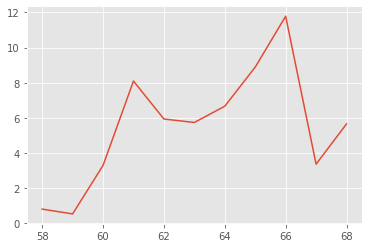

In [8]:
plt.plot(np.arange(58,69),np.mean(ww,axis=(0,2)))
plt.show()

### Moments - Women

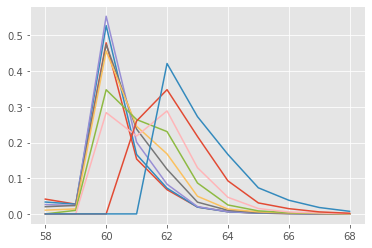

In [9]:
plt.plot(np.arange(58,69),mm[1,:,:9])
plt.show()

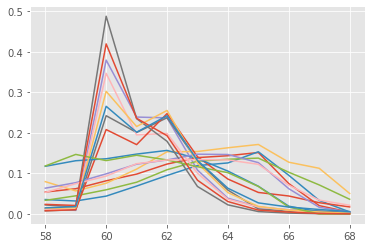

In [10]:
plt.plot(np.arange(58,69),mm[1,:,9:])
plt.show()

### Moments - Men

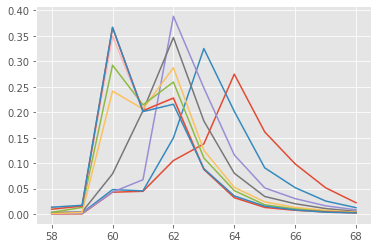

In [11]:
plt.plot(np.arange(58,69),mm[0,:,:9])
plt.show()

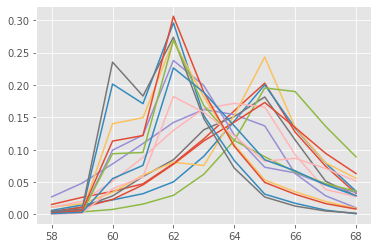

In [12]:
plt.plot(np.arange(58,69),mm[0,:,9:])
plt.show()

### Set up model for estimation

In [13]:
Couple.par.sim_seed = Couple.par.sim_seed + 100 # set new seed
Couple.recompute()
Couple.Single.recompute()

In [14]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFunCouple_hs_elig(Couple)

In [15]:
par = Couple.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta, par.phi_0_male, par.phi_1])

est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta", "phi_0_male", "phi_1"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par

In [17]:
print('true par :', true)
print('obj(true):', smd.obj_fun(true,weight))

true par : [ 0.3    0.5    0.053  0.435  1.3   -0.621]
obj(true): 0.25183341946288645


### Run estimation

In [21]:
theta0 = SMD.start(10,bounds=[(0.0,1.0), (0.0,1.0), (-1.0,1.0), (0.2,0.8), (0.5,2.0), (-1.0,1.0)])
theta0[0] = list(true)

[[0.144, 0.239, 0.504, 0.327, 1.477, -0.814],
 [0.177, 0.198, 0.024, 0.572, 0.976, -0.466],
 [0.572, 0.395, -0.188, 0.206, 1.188, 0.924],
 [0.751, 0.008, 0.915, 0.465, 1.561, -0.716]]

In [1]:
smd.MultiStart(theta0,weight)
theta = smd.est

In [20]:
print('par :', est_par)
print('bias:', theta-true)

par : ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'sigma_eta', 'phi_0_male', 'phi_1']
bias: [ 0.00173539 -0.0096842   0.00050699  0.01175999  0.02979721  0.00625349]
